## Kmeans 

### Observa√ß√µes iniciais

- Este algoritmo n√£o se enquadra nem em regress√£o nem em classifica√ß√£o. Ele √© um algoritmo de Aprendizado N√£o Supervisionado e n√£o tem uma vari√°vel alvo (y) pra prever, em vez disso, seu objetivo √© encontrar padr√µes ocultos e agrupamentos (clusters) nos dados de entrada (X).

- No caso deste projeto eu usei o K-means para agrupar as transa√ß√µes do Walmart em 3 clusters com base nas colunas: unit_price, quantity, rating e profit_margin.

In [14]:
""" Imports """
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("--- In√≠cio do Notebook: √Årvore de Decis√£o ---")

--- In√≠cio do Notebook: √Årvore de Decis√£o ---


In [15]:
df_walmart = pd.read_csv(r'..\data\Walmart.csv') #OR (r'data\Walmart.csv')
print("Dataset 'Walmart.csv' carregado com sucesso!")
print("\nPrimeiras 5 linhas do dataset:")
display(df_walmart.head())

Dataset 'Walmart.csv' carregado com sucesso!

Primeiras 5 linhas do dataset:


invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity      date      time payment_method  rating  profit_margin  
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48

In [16]:
print("\nInforma√ß√µes gerais do dataset:")
df_walmart.info()


Informa√ß√µes gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [17]:
print("\nEstat√≠sticas descritivas das colunas num√©ricas:")
display(df_walmart.describe())


Estat√≠sticas descritivas das colunas num√©ricas:


invoice_id      quantity        rating  profit_margin
count  10051.000000  10020.000000  10051.000000   10051.000000
mean    5025.741220      2.353493      5.825659       0.393791
std     2901.174372      1.602658      1.763991       0.090669
min        1.000000      1.000000      3.000000       0.180000
25%     2513.500000      1.000000      4.000000       0.330000
50%     5026.000000      2.000000      6.000000       0.330000
75%     7538.500000      3.000000      7.000000       0.480000
max    10000.000000     10.000000     10.000000       0.570000

In [18]:
"""Prepara√ß√£o para implementa√ß√£o do K-Means"""

# Coluna 'unit_prive' precisa ser convertida para num√©rica e aproveitando e removendo o s√≠mbolo $
df_walmart['unit_price'] = df_walmart['unit_price'].astype(str).str.replace('$', '', regex=False).astype(float)



In [19]:
# 2. Identificar colunas num√©ricas para K-Means
numerical_cols_for_kmeans = ['unit_price', 'quantity', 'rating', 'profit_margin']

# Verificar se todas as colunas selecionadas existem no DataFrame
missing_cols = [col for col in numerical_cols_for_kmeans if col not in df_walmart.columns]
if missing_cols:
    print(f"\nErro: As seguintes colunas num√©ricas n√£o foram encontradas: {missing_cols}")
    print("Isso n√£o deveria acontecer ap√≥s a corre√ß√£o, mas √© uma verifica√ß√£o de seguran√ßa.")
else:
    X_kmeans = df_walmart[numerical_cols_for_kmeans].copy()

In [20]:
"""Pre processamento dos dados para K-Means"""

# Valores ausentes: usar m√©dia
for col in numerical_cols_for_kmeans:
        if X_kmeans[col].isnull().any():
            mean_val = X_kmeans[col].mean()
            X_kmeans[col].fillna(mean_val, inplace=True)
            print(f"Valores ausentes na coluna '{col}' preenchidos com a m√©dia: {mean_val:.2f}")


Valores ausentes na coluna 'unit_price' preenchidos com a m√©dia: 50.63
Valores ausentes na coluna 'quantity' preenchidos com a m√©dia: 2.35


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\1191923365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_kmeans[col].fillna(mean_val, inplace=True)


In [21]:
""" Escalonamento dos dados """
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)
X_kmeans_scaled_df = pd.DataFrame(X_kmeans_scaled, columns=numerical_cols_for_kmeans)

print("\nDados num√©ricos selecionados e escalonados (primeiras 5 linhas):")
print(X_kmeans_scaled_df.head())


Dados num√©ricos selecionados e escalonados (primeiras 5 linhas):
   unit_price  quantity    rating  profit_margin
0    1.136833  2.903877  1.856305       0.950862
1   -1.670291  1.653959  2.139767       0.950862
2   -0.203178  2.903877  0.892533      -0.703591
3    0.358625  3.528836  1.459457      -0.703591
4    1.685878  2.903877 -0.298009       0.950862


In [22]:
"""4. Aplica√ß√£o do K-Means"""

# Usarei 3 clusters(grupos)
#Obs: O n√∫mero ideal de clusters pode ser determinado com m√©todos como o "Elbow Method".

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_walmart['Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

print(f"\nK-Means aplicado com {n_clusters} clusters.")
print("\nContagem de pontos em cada cluster:")
print(df_walmart['Cluster'].value_counts())

print("\nPrimeiras 10 linhas do DataFrame com os r√≥tulos de cluster:")
print(df_walmart[['unit_price', 'quantity', 'rating', 'profit_margin', 'Cluster']].head(10))



K-Means aplicado com 3 clusters.

Contagem de pontos em cada cluster:
Cluster
0    5045
2    4459
1     547
Name: count, dtype: int64

Primeiras 10 linhas do DataFrame com os r√≥tulos de cluster:
   unit_price  quantity  rating  profit_margin  Cluster
0       74.69       7.0     9.1           0.48        1
1       15.28       5.0     9.6           0.48        1
2       46.33       7.0     7.4           0.33        1
3       58.22       8.0     8.4           0.33        1
4       86.31       7.0     5.3           0.48        1
5       85.39       7.0     4.1           0.48        1
6       68.84       6.0     5.8           0.33        1
7       73.56      10.0     8.0           0.18        1
8       36.26       2.0     7.2           0.33        0
9       54.84       3.0     5.9           0.33        0


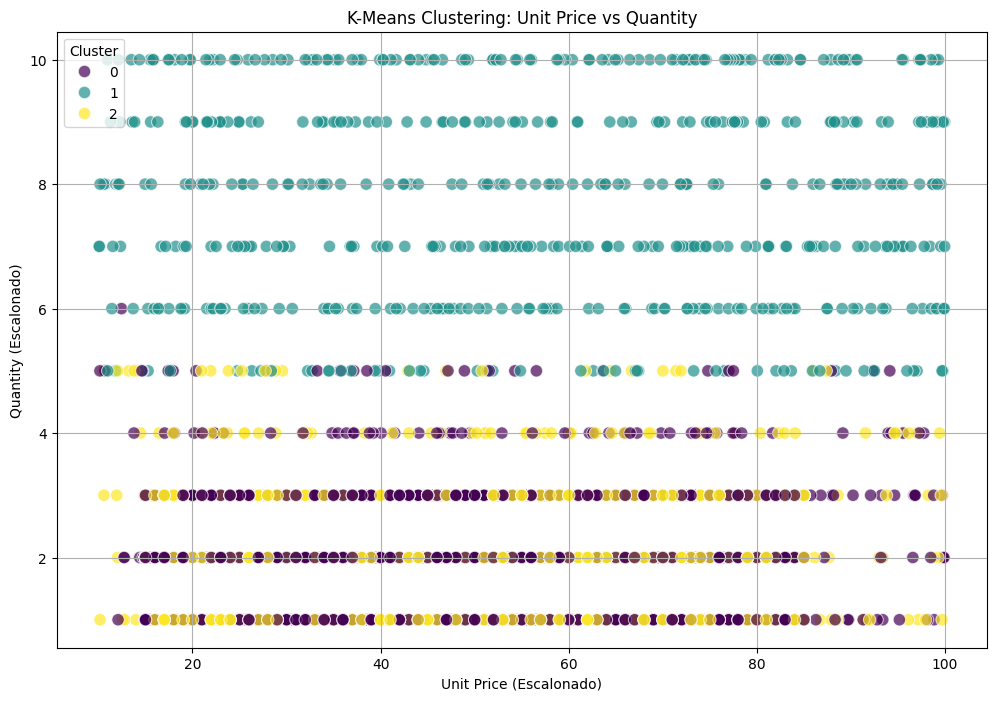

In [23]:
"""Visualiza√ß√£o dos clusters"""

plt.figure(figsize=(12, 8))
sns.scatterplot(x='unit_price', y='quantity', hue='Cluster', palette='viridis', data=df_walmart, s=80, alpha=0.7)
plt.title(f'K-Means Clustering: Unit Price vs Quantity')
plt.xlabel('Unit Price (Escalonado)')
plt.ylabel('Quantity (Escalonado)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [24]:
print("\nM√©dias das caracter√≠sticas por Cluster:")
print(df_walmart.groupby('Cluster')[['unit_price', 'quantity', 'rating', 'profit_margin']].mean())



M√©dias das caracter√≠sticas por Cluster:
         unit_price  quantity    rating  profit_margin
Cluster                                               
0         50.509732  2.039547  5.648999       0.314938
1         56.702011  7.776965  7.095612       0.394278
2         50.018500  2.041207  5.869747       0.482947



## Descobertas com K-Means no Dataset do Walmart

### üìä Identifica√ß√£o de 3 Perfis de Transa√ß√µes

#### **Cluster 0: Compras de Baixa Quantidade e Margem Padr√£o**

* **Pre√ßo unit√°rio:** M√©dio
* **Quantidade:** Baixa (\~2 unidades)
* **Avalia√ß√£o:** M√©dia
* **Margem de lucro:** **Baixa (0.31)**
* **üí° Interpreta√ß√£o:** Compras comuns, com pouca margem de lucro. Pode indicar itens com alta concorr√™ncia ou baixo valor agregado.

---

#### **Cluster 1: Compradores de Alto Volume e Alta Satisfa√ß√£o**

* **Pre√ßo unit√°rio:** Ligeiramente mais alto
* **Quantidade:** **Muito alta (\~7.78 unidades)**
* **Avalia√ß√£o:** **Mais alta (7.10)**
* **Margem de lucro:** M√©dia (0.39)
* **üí° Interpreta√ß√£o:** Clientes valiosos ‚Äî fazem grandes compras e s√£o muito satisfeitos. Podem ser fam√≠lias grandes ou compradores atacadistas.

---

#### **Cluster 2: Transa√ß√µes de Alta Margem de Lucro**

* **Pre√ßo unit√°rio:** M√©dio
* **Quantidade:** Baixa (\~2 unidades)
* **Avalia√ß√£o:** M√©dia
* **Margem de lucro:** **Mais alta (0.48)**
* **üí° Interpreta√ß√£o:** Poucas unidades, mas alta rentabilidade. Possivelmente produtos com maior valor agregado ou de marca pr√≥pria.

---

## Aplica√ß√µes para o Walmart

* **Marketing Direcionado:**

  * *Cluster 1:* Programas de fidelidade, combos e promo√ß√µes.
  * *Cluster 0:* Melhorar margens com produtos mais rent√°veis.
  * *Cluster 2:* Promover produtos de alta margem e entender seu desempenho.

* **Otimiza√ß√£o de Estoque e Loja:**
  Facilitar acesso a itens comprados em grandes volumes (Cluster 1).

* **Gest√£o de Produtos:**
  Avaliar quais produtos manter, reformular ou descontinuar.

* **Personaliza√ß√£o:**
  Ajustar layout e ofertas com base no tipo de transa√ß√£o, mesmo sem identificar o cliente.

* **An√°lise de Desempenho:**
  Avaliar filiais com base na atra√ß√£o de clientes de alto valor ou alta margem.



In [25]:
print("--- Incrementa√ß√£o do notebook: Kmeans ---")

--- Incrementa√ß√£o do notebook: Kmeans ---


--- M√©todo do Cotovelo para Determinar o K Ideal ---


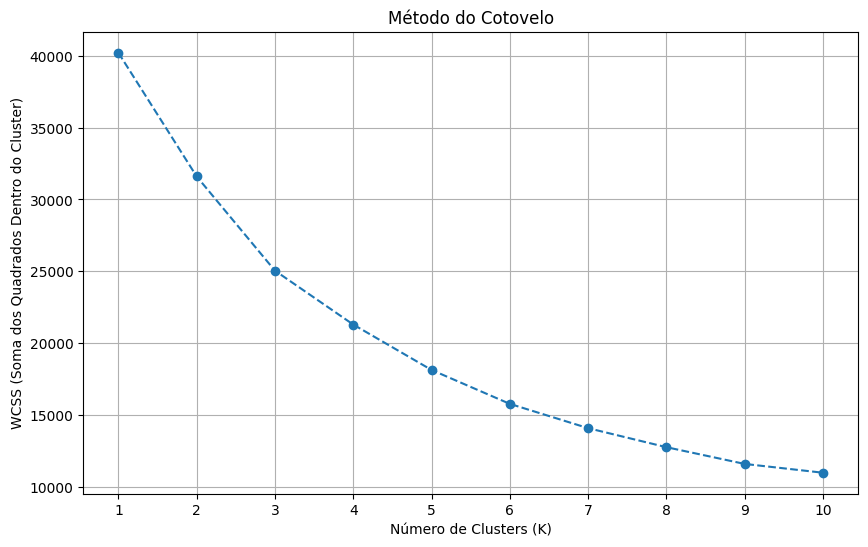


**Interpreta√ß√£o:** Procure um 'cotovelo' no gr√°fico, onde a diminui√ß√£o do WCSS come√ßa a se estabilizar. Esse ponto sugere um n√∫mero ideal de clusters para o seu dado.
Por exemplo, se o cotovelo for em K=3, isso justifica a sua escolha de 3 clusters.


In [26]:
# C√©lula: Determinando o N√∫mero Ideal de Clusters (M√©todo do Cotovelo)

print("--- M√©todo do Cotovelo para Determinar o K Ideal ---")

# Lista para armazenar a soma dos quadrados dentro do cluster (WCSS)
# para diferentes n√∫meros de clusters.
wcss = []

# Tentaremos diferentes valores de K (por exemplo, de 1 a 10)
# 'X_kmeans_scaled' deve estar dispon√≠vel das c√©lulas anteriores do seu notebook
# (ou seja, os dados num√©ricos escalonados que voc√™ usou para o K-Means).
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_elbow.fit(X_kmeans_scaled)
    wcss.append(kmeans_elbow.inertia_) # 'inertia_' √© o WCSS

# Plotando o gr√°fico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('WCSS (Soma dos Quadrados Dentro do Cluster)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("\n**Interpreta√ß√£o:** Procure um 'cotovelo' no gr√°fico, onde a diminui√ß√£o do WCSS come√ßa a se estabilizar. Esse ponto sugere um n√∫mero ideal de clusters para o seu dado.")
print("Por exemplo, se o cotovelo for em K=3, isso justifica a sua escolha de 3 clusters.")

In [28]:
# C√©lula: Re-implementando K-Means com n_clusters = 4

print("--- Implementando K-Means com 4 Clusters ---")

# Definir o n√∫mero de clusters como 4
n_clusters_new = 4
kmeans_4 = KMeans(n_clusters=n_clusters_new, random_state=42, n_init=10)

# Assumindo que 'X_kmeans_scaled' e 'df_walmart' est√£o dispon√≠veis das c√©lulas anteriores.
# Reajustar o modelo K-Means
df_walmart['Cluster_K4'] = kmeans_4.fit_predict(X_kmeans_scaled)

print(f"\nK-Means aplicado com {n_clusters_new} clusters.")
print("\nContagem de pontos em cada novo cluster (K=4):")
print(df_walmart['Cluster_K4'].value_counts())

print("\nPrimeiras 10 linhas do DataFrame com os novos r√≥tulos de cluster (K=4):")
# Ajuste as colunas aqui para as que voc√™ usou no K-Means
display(df_walmart[['unit_price', 'quantity', 'rating', 'profit_margin', 'Cluster_K4']].head(10))

--- Implementando K-Means com 4 Clusters ---

K-Means aplicado com 4 clusters.

Contagem de pontos em cada novo cluster (K=4):
Cluster_K4
1    3526
3    3182
0    2825
2     518
Name: count, dtype: int64

Primeiras 10 linhas do DataFrame com os novos r√≥tulos de cluster (K=4):


unit_price  quantity  rating  profit_margin  Cluster_K4
0       74.69       7.0     9.1           0.48           2
1       15.28       5.0     9.6           0.48           3
2       46.33       7.0     7.4           0.33           2
3       58.22       8.0     8.4           0.33           2
4       86.31       7.0     5.3           0.48           2
5       85.39       7.0     4.1           0.48           2
6       68.84       6.0     5.8           0.33           2
7       73.56      10.0     8.0           0.18           2
8       36.26       2.0     7.2           0.33           3
9       54.84       3.0     5.9           0.33           1

In [29]:
# Analisar as m√©dias das caracter√≠sticas para os novos 4 clusters
print(f"\n--- M√©dias das caracter√≠sticas por Cluster (K={n_clusters_new}) ---")
print(df_walmart.groupby('Cluster_K4')[['unit_price', 'quantity', 'rating', 'profit_margin']].mean())

print("\n--- Fim da implementa√ß√£o K-Means com K=4 ---")


--- M√©dias das caracter√≠sticas por Cluster (K=4) ---
            unit_price  quantity    rating  profit_margin
Cluster_K4                                               
0            49.321869  2.028429  4.768496       0.483250
1            50.421170  2.044034  4.765315       0.309223
2            57.692876  7.930502  6.980502       0.392317
3            50.869306  2.074179  7.751194       0.408319

--- Fim da implementa√ß√£o K-Means com K=4 ---


--- Contagem Visual de Membros por Cluster (K=4) ---


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\783234084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_K4', data=df_walmart, palette='viridis') # Usar Cluster_K4


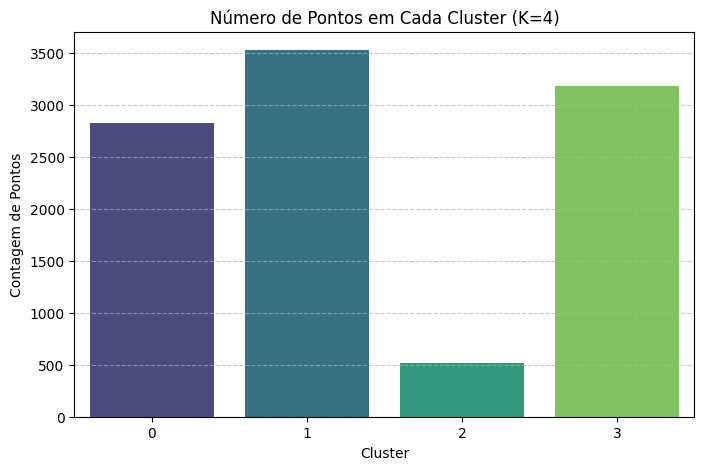


**Interpreta√ß√£o:** Este gr√°fico mostra visualmente o tamanho relativo de cada um dos 4 clusters. Voc√™ pode ver se h√° grupos muito grandes ou muito pequenos, o que pode impactar a interpreta√ß√£o.


In [ ]:
# C√©lula: Contagem de Membros por Cluster (Gr√°fico de Barras, K=4)

print("--- Contagem Visual de Membros por Cluster (K=4) ---")

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster_K4', data=df_walmart, palette='viridis') # Usar Cluster_K4
plt.title('N√∫mero de Pontos em Cada Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Pontos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Relat√≥rio de Gr√°fico: Contagem de Membros por Cluster (K=4)**

Este gr√°fico de barras apresenta a distribui√ß√£o de pontos de dados entre os 4 clusters identificados pelo algoritmo K-Means.

* **Observa√ß√£o Principal:** √â not√°vel que a distribui√ß√£o dos pontos pelos clusters √© **desbalanceada**. Os Clusters 0, 1 e 3 s√£o os maiores, contendo a vasta maioria dos pontos de dados, enquanto o Cluster 2 √© significativamente menor.
* **Implica√ß√£o:** Essa assimetria no tamanho dos clusters sugere que a maioria das transa√ß√µes se encaixa em 3 perfis principais (Clusters 0, 1 e 3), com um menor n√∫mero de transa√ß√µes representando perfis mais espec√≠ficos ou nichos (Clusters 2).


--- Pairplot das Caracter√≠sticas por Cluster (K=4) ---


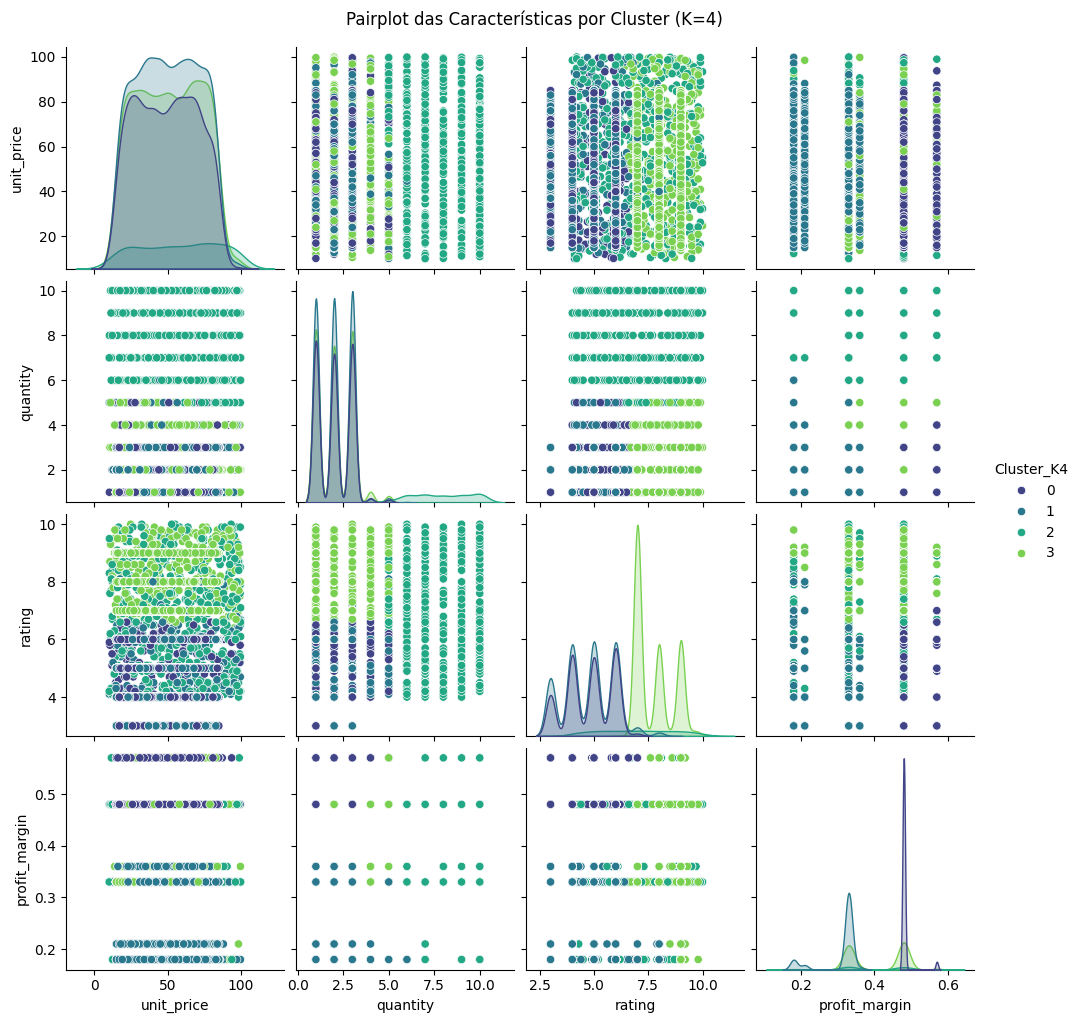


**Interpreta√ß√£o:** Observe como os 4 clusters se separam visualmente em diferentes combina√ß√µes de caracter√≠sticas. As cores ajudam a distinguir os grupos. Procure por sobreposi√ß√µes e por separa√ß√µes claras.


In [ ]:
# C√©lula: Visualiza√ß√£o dos Clusters com Pairplot (K=4)

print("--- Pairplot das Caracter√≠sticas por Cluster (K=4) ---")

# Crie uma c√≥pia do DataFrame com as colunas relevantes e o cluster
df_plot_k4 = df_walmart[numerical_cols_for_kmeans + ['Cluster_K4']].copy()
# convertendo a coluna 'Cluster_K4' para tipo categ√≥rico para melhorar na hora do plot
df_plot_k4['Cluster_K4'] = df_plot_k4['Cluster_K4'].astype('category')

sns.pairplot(df_plot_k4, hue='Cluster_K4', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot das Caracter√≠sticas por Cluster (K=4)', y=1.02) # T√≠tulo acima dos subplots
print("\n As cores ajudam a distinguir os grupos. Procure por sobreposi√ß√µes e por separa√ß√µes claras.")
plt.show()


#### üß† **Principais Insights**:

* **unit\_price** mostra boa separa√ß√£o entre clusters, sugerindo que o pre√ßo foi um fator relevante na forma√ß√£o dos grupos.
* **rating** apresenta uma distribui√ß√£o mais concentrada, mas ainda assim distingue certos clusters com m√©dias mais altas ou mais baixas.
* **profit\_margin** tem varia√ß√µes claras entre os grupos, com alguns clusters concentrados em margens mais baixas ou mais altas.
* **quantity** √© mais dispersa, com sobreposi√ß√£o entre clusters, indicando menor poder discriminativo nessa vari√°vel.

#### üìå **Conclus√£o**:

O modelo de clusteriza√ß√£o conseguiu identificar perfis distintos de vendas com base especialmente em `unit_price`, `rating` e `profit_margin`. 

--- Box Plots das Caracter√≠sticas por Cluster (K=4) ---


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis') # Usar df_plot_k4 e Cluster_K4
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis') # Usar df_plot_k4 e Cluster_K4
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4'


 varia√ß√£o de uma caracter√≠stica espec√≠fica em cada um dos 4 clusters.


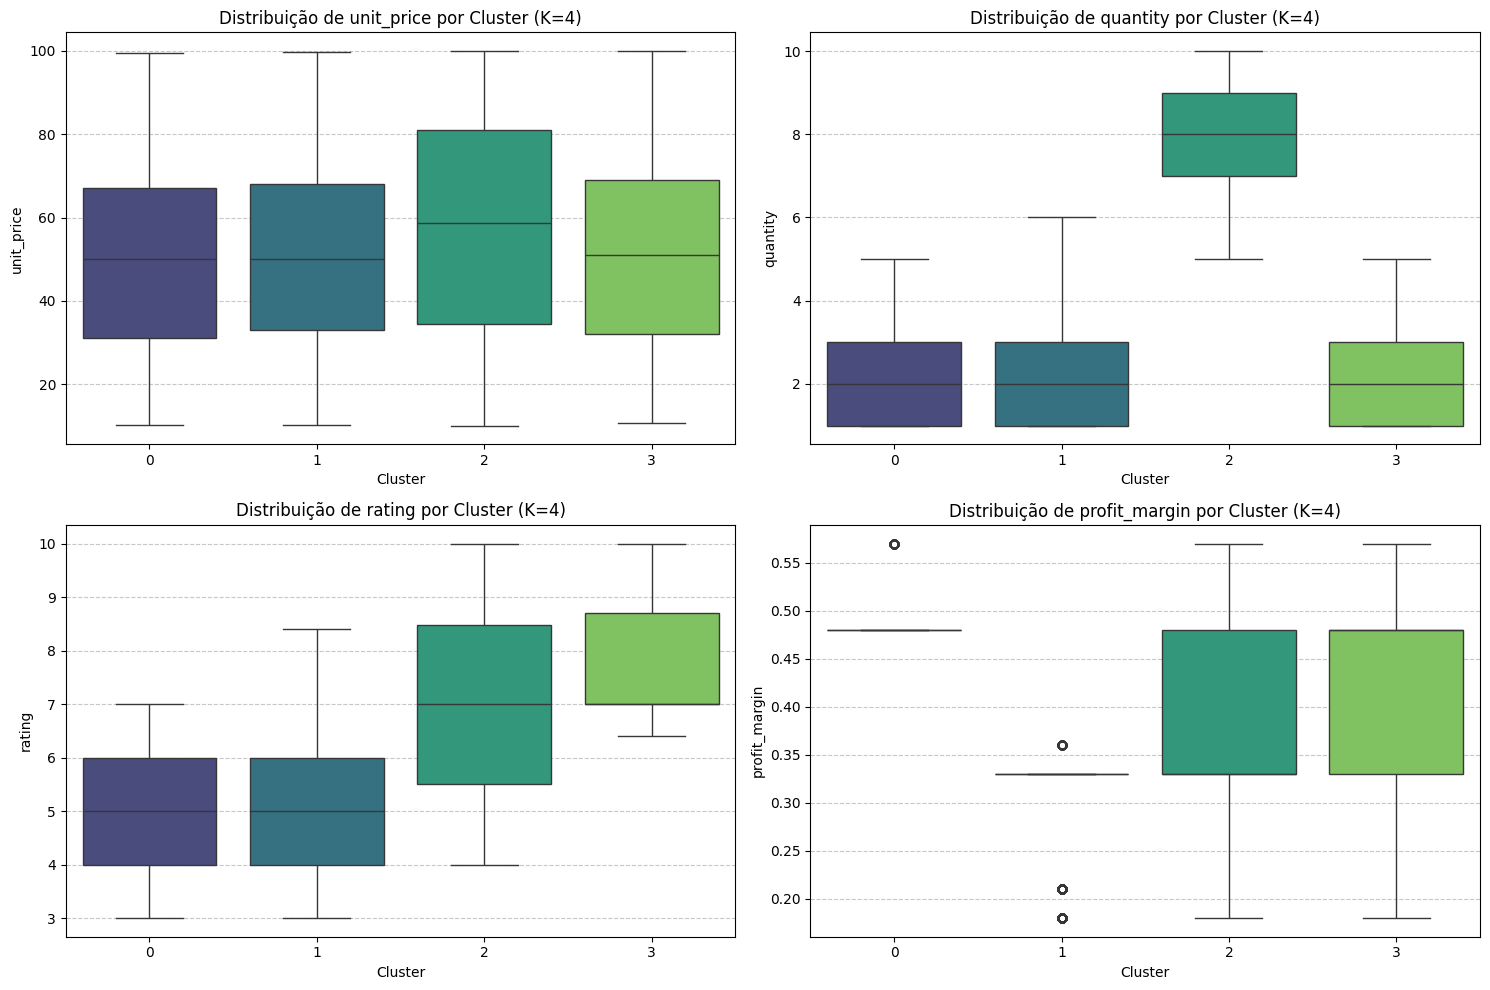

In [ ]:
# C√©lula: Distribui√ß√£o das Caracter√≠sticas por Cluster (Box Plots, K=4)

print("--- Box Plots das Caracter√≠sticas por Cluster (K=4) ---")

# numerical_cols_for_kmeans --> lista das colunas num√©ricas
plt.figure(figsize=(15, 10)) # Ajuste o tamanho conforme o n√∫mero de features

for i, feature in enumerate(numerical_cols_for_kmeans):
    plt.subplot(2, 2, i + 1) # 2, 2 grid para 4 plots
    sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis')
    plt.title(f'Distribui√ß√£o de {feature} por Cluster (K=4)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Ajustando os subplots para n√£o se sobreporem
print("\n Varia√ß√£o de uma caracter√≠stica espec√≠fica em cada um dos 4 clusters:")
plt.show()


### **üß† Insights principais (K=4)**

Este conjunto de gr√°ficos mostra a distribui√ß√£o das vari√°veis `unit_price`, `quantity`, `rating` e `profit_margin` para cada um dos **4 clusters identificados** na an√°lise de vendas.

#### üîç **Principais Observa√ß√µes por Vari√°vel**:

* **unit\_price**:

  * Os quatro clusters possuem faixas semelhantes de pre√ßo.
  * O **Cluster 2** tem a maior mediana de pre√ßos, enquanto os Clusters 0 e 1 concentram valores mais baixos.

* **quantity**:

  * O **Cluster 2** se destaca com maior quantidade vendida (mediana pr√≥xima de 8).
  * Os demais clusters t√™m quantidades significativamente menores (mediana de 2 ou menos), sugerindo vendas unit√°rias ou de poucos itens.

* **rating**:

  * O **Cluster 0 e 1** concentram avalia√ß√µes mais baixas.
  * **Cluster 3** tem as maiores avalia√ß√µes m√©dias, seguido pelo Cluster 2.

* **profit\_margin**:

  * **Cluster 0** √© o mais est√°vel, com alta margem e baixa variabilidade.
  * Clusters 2 e 3 apresentam maior dispers√£o, mas tendem a margens mais altas.
  * **Cluster 1** concentra as menores margens de lucro.

#### üìå **Conclus√£o**:

Os clusters representam **perfis de venda distintos**:

* **Cluster 2**: vendas em maior quantidade, pre√ßos e avalia√ß√µes medianas, margens variadas.
* **Cluster 0**: margens altas, mas vendas unit√°rias e produtos com avalia√ß√µes mais baixas (**potencial ponto de aten√ß√£o**). 
* **Cluster 1**: baixo volume, baixa margem e avalia√ß√µes baixas (**potencial ponto de aten√ß√£o**).
* **Cluster 3**: equil√≠brio entre avalia√ß√£o alta e boa margem, embora com menor volume.
